<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 800>

# Assignment 1
### Sesi 8_PYTN-KS09-002
### Nama : Elsa Wulandari

# 1. Project Overview
Tujuan dari proyek ini adalah untuk memvisualisasikan data dengan Python menggunakan dataset London Crime yang didapat dari Kaggle. Data ini mencakup jumlah laporan kriminal menurut bulan, wilayah LSOA, dan kategori mayor/minor dari Jan 2008-Des 2016.


Data yang terdapat di dataset ini yaitu :

Kumpulan data ini berisi:
* `lsoa_code`: kode area polisi
* `borough`: wilayah kota London yang terkait dengan data statistik
* `mayor_category`: kategori kejahatan utama
* `minor_category`: kategori kejahatan ringan
* `value`: jumlah kejahatan yang terjadi di wilayah (borough) tertentu pada bulan tertentu
* `year`: ringkasan tahun kejadian
* `month`: ringkasan bulan kejadian


# 2. Mempersiapkan Data
Untuk memulainya maka dataset yang diperlukan yaitu London Crime Dataset harus disiapkan lalu mengimpor dua modul analisis data utama: Pandas dan NumPy.

## Import Library

In [1]:
import pandas as pd # primary data structure library
import numpy as np # useful for many scientific computing in Python

#membuat peta
import folium
from folium import plugins

# Untuk keperluan plotting
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from timeit import default_timer
import matplotlib.dates as mdates
%matplotlib inline

# untuk membuat wordcloud
from wordcloud import WordCloud, STOPWORDS
print('Library siap digunakan!')

Library siap digunakan!


## Membaca Dataset

In [2]:
df = pd.read_csv('london_crime_by_lsoa.csv')
print('Data is loaded into a Pandas data frame!')

Data is loaded into a Pandas data frame!


Dataset link https://www.kaggle.com/datasets/jboysen/london-crime

In [3]:
df.head()#Melihat 5 baris atas dari kumpulan data.

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
df.tail()#Melihat 5 baris bawah dari kumpulan data

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


Untuk Memudahkan maka kita dapat mengganti nama kolom ke bahasa indonesia

In [5]:
df = df.rename(
    columns={
        'lsoa_code': 'Kode Area',
        'borough': 'Wilayah',
        'major_category': 'Kejahatan Mayor',
        'minor_category': 'Kejahatan Minor',
        'value': 'Jumlah Kasus',
        'year': 'Tahun',
        'month': 'Bulan'
    },
)

In [6]:
display(df)

,Kode Area,Wilayah,Kejahatan Mayor,Kejahatan Minor,Jumlah Kasus,Tahun,Bulan
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [7]:
baris, kolom = df.shape
print("Dimensi Data")
print(baris, " baris")
print(kolom, " kolom")

Dimensi Data
13490604  baris
7  kolom


In [8]:
df.columns.values#Melihat nama-nama columns yang ada di dataset

array(['Kode Area', 'Wilayah', 'Kejahatan Mayor', 'Kejahatan Minor',
       'Jumlah Kasus', 'Tahun', 'Bulan'], dtype=object)

In [9]:
df.dtypes

Kode Area          object
Wilayah            object
Kejahatan Mayor    object
Kejahatan Minor    object
Jumlah Kasus        int64
Tahun               int64
Bulan               int64
dtype: object

Berdasarkan hasil di atas, ada dua tipe data yang digunakan.
- Tipe data yang digunakan untuk kolom [Kode Area, Wilayah, Kejahatan Major, Kejahatan Minor] adalah string(str) dan,
- Tipe data yang digunakan untuk kolom [Jumlah Kasus, Tahun, Bulan] adalah integer(int). 

In [10]:
df.describe(include='O')

,Kode Area,Wilayah,Kejahatan Mayor,Kejahatan Minor
count,13490604,13490604,13490604,13490604
unique,4835,33,9,32
top,E01003689,Croydon,Theft and Handling,Common Assault
freq,3456,602100,3966300,522180


In [11]:
df.describe() #Menampilkan deskriptif statistik data pada kolom yang bertipe numerik

,Jumlah Kasus,Tahun,Bulan
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [12]:
df['Tahun'].unique()

array([2016, 2015, 2008, 2012, 2010, 2013, 2014, 2011, 2009], dtype=int64)

Nilai unik yang terdapat pada column Tahun adalah : 2016,2015,2008,2012,2010,2013, 2014, 2011, 2009

In [13]:
df['Wilayah'].unique()

array(['Croydon', 'Greenwich', 'Bromley', 'Redbridge', 'Wandsworth',
       'Ealing', 'Hounslow', 'Newham', 'Sutton', 'Haringey', 'Lambeth',
       'Richmond upon Thames', 'Hillingdon', 'Havering',
       'Barking and Dagenham', 'Kingston upon Thames', 'Westminster',
       'Hackney', 'Enfield', 'Harrow', 'Lewisham', 'Brent', 'Southwark',
       'Barnet', 'Waltham Forest', 'Camden', 'Bexley',
       'Kensington and Chelsea', 'Islington', 'Tower Hamlets',
       'Hammersmith and Fulham', 'Merton', 'City of London'], dtype=object)

Nilai unik yang terdapat pada column Wilayah adalah :  **Croydon**, **Greenwich**, **Bromley**, **Redbridge**, **Wandsworth**, **Ealing**, **Hounslow**, **Newham**, **Sutton**, **Haringey**, **Lambeth**,**Richmond upon Thames**, **Hillingdon**, **Havering**,**Barking and Dagenham**, **Kingston upon Thames**, **Westminster**,**Hackney**, **Enfield**, **Harrow**, **Lewisham**, **Brent**, **Southwark**,**Barnet**, **Waltham Forest**, **Camden**, **Bexley**,**Kensington and Chelsea**, **Islington**, **Tower Hamlets**,**Hammersmith and Fulham**, **Merton**, **City of London**.

In [14]:
df['Kejahatan Mayor'].unique()

array(['Burglary', 'Violence Against the Person', 'Robbery',
       'Theft and Handling', 'Criminal Damage', 'Drugs',
       'Fraud or Forgery', 'Other Notifiable Offences', 'Sexual Offences'],
      dtype=object)

Nilai unik yang terdapat pada column Kejahatan Mayor adalah : 'Burglary', 'Violence Against the Person', 'Robbery',
       'Theft and Handling', 'Criminal Damage', 'Drugs','Fraud or Forgery', 'Other Notifiable Offences', 'Sexual Offences'

In [15]:
df['Kejahatan Minor'].unique()

array(['Burglary in Other Buildings', 'Other violence',
       'Personal Property', 'Other Theft', 'Offensive Weapon',
       'Criminal Damage To Other Building', 'Theft/Taking of Pedal Cycle',
       'Motor Vehicle Interference & Tampering',
       'Theft/Taking Of Motor Vehicle', 'Wounding/GBH',
       'Other Theft Person', 'Common Assault', 'Theft From Shops',
       'Possession Of Drugs', 'Harassment', 'Handling Stolen Goods',
       'Criminal Damage To Dwelling', 'Burglary in a Dwelling',
       'Criminal Damage To Motor Vehicle', 'Other Criminal Damage',
       'Counted per Victim', 'Going Equipped', 'Other Fraud & Forgery',
       'Assault with Injury', 'Drug Trafficking', 'Other Drugs',
       'Business Property', 'Other Notifiable', 'Other Sexual',
       'Theft From Motor Vehicle', 'Rape', 'Murder'], dtype=object)

Nilai unik yang terdapat pada column Kejahatan Minor adalah : 'Burglary in Other Buildings', 'Other violence',
'Personal Property', 'Other Theft', 'Offensive Weapon', 'Criminal Damage To Other Building', 'Theft/Taking of Pedal Cycle',
'Motor Vehicle Interference & Tampering','Theft/Taking Of Motor Vehicle', 'Wounding/GBH','Other Theft Person', 'Common Assault', 'Theft From Shops','Possession Of Drugs', 'Harassment', 'Handling Stolen Goods','Criminal Damage To Dwelling','Burglary in a Dwelling','Criminal Damage To Motor Vehicle', 'Other Criminal Damage','Counted per Victim', 'Going Equipped', 'Other Fraud & Forgery','Assault with Injury', 'Drug Trafficking', 'Other Drugs','Business Property', 'Other Notifiable', 'Other Sexual','Theft From Motor Vehicle', 'Rape', 'Murder'.

In [16]:
df['Bulan'].unique()

array([11,  5,  3,  6,  7,  4,  9,  8, 12,  1, 10,  2], dtype=int64)

Nilai unik yang terdapat pada column Bulan adalah : 11,  5,  3,  6,  7,  4,  9,  8, 12,  1, 10,  2

In [17]:
df['Jumlah Kasus'].unique()

array([  0,   1,   2,   3,   4,   9,   5,   6,   7,  10,  18,  11,  16,
         8,  72,  12,  53,  14,  19,  15,  17,  20,  43,  50,  37,  57,
        21,  13,  80,  25,  28,  22,  58,  33,  29,  38,  88,  23, 111,
        40,  39,  60,  26,  48,  32,  66, 122,  47,  30, 118,  75,  54,
        51,  67,  45,  35,  24, 117,  27,  68,  99,  65,  84,  34,  55,
        81, 112, 119,  71, 113,  36,  61,  46,  31,  59,  44, 149,  49,
       241, 104,  69,  77,  41,  64,  42, 167,  73,  74, 165, 107,  86,
        52,  63,  79, 103, 106,  70,  90,  91, 148, 130,  62, 136,  98,
        92, 141,  78,  82,  56, 194, 168, 152, 204, 114, 153, 116, 157,
       131, 120,  96, 101,  97,  95, 309, 142,  87, 146, 195,  93, 166,
       144,  94, 161, 135, 170,  76, 127, 210,  83, 150, 186, 156, 124,
        85, 174, 221, 163, 109, 110,  89, 115, 138, 140, 121, 139, 105,
       129, 177, 237, 235, 226, 199, 240, 189, 280, 100, 102, 288, 134,
       244, 211, 158, 187, 137, 123, 164, 108, 224, 201, 233, 13

Nilai unik yang terdapat pada column Jumlah Kasus adalah : 0,   1,   2,   3,   4,   9,   5,   6,   7,  10,  18,  11,  16,
8,  72,  12,  53,  14,  19,  15,  17,  20,  43,  50,  37,  57,21,  13,  80,  25,  28,  22,  58,  33,  29,  38,  88,  23, 111,40,  39,  60,  26,  48,  32,  66, 122,  47,  30, 118,  75,  54,51,  67,  45,  35,  24, 117,  27,  68,  99,  65,  84,  34,  55, 81, 112, 119,  71, 113,  36,  61,  46,  31,  59,  44, 149,  49,241, 104,  69,  77,  41,  64,  42, 167,  73,  74, 165, 107,  86, 52,  63,  79, 103, 106,  70,  90,  91, 148, 130,  62, 136,  98, 92, 141,  78,  82,  56, 194, 168, 152, 204, 114, 153, 116, 157,131, 120,  96, 101,  97,  95, 309, 142,  87, 146, 195,  93, 166,144,  94, 161, 135, 170,  76, 127, 210,  83, 150, 186, 156, 124,85, 174, 221, 163, 109, 110,  89, 115, 138, 140, 121, 139, 105,129, 177, 237, 235, 226, 199, 240, 189, 280, 100, 102, 288, 134,244, 211, 158, 187, 137, 123, 164, 108, 224, 201, 233, 132, 220,126, 154, 133, 257, 178, 214, 147, 229, 176, 202, 230, 155, 162,160, 203, 248, 215, 172, 192, 208, 232, 197, 173, 216, 205, 180,151, 184, 179, 243, 188, 228, 159, 254, 267, 247, 196, 181, 193,260, 169, 281, 212, 183, 128, 217, 143, 239, 200, 249, 125, 253,145, 185, 190, 286, 258, 182, 175, 198, 262, 251, 236, 300, 218

In [18]:
print("Total keseluruhan missing values = ",
      df.isnull().sum().sum())

Total keseluruhan missing values =  0


Dalam dataset ini tidak terdapat missing values

## 3. Data Visualization

---
## A. Area Plot

Area plot adalah bentuk modifikasi dari line plot, sehingga area plot juga dikenal sebagai Multiple Stacked Line Plot. Dengan menggunakan area plot, kita dapat membandingkan beberapa objek tertentu berdasarkan data berbasis waktu.

### Pertanyaan 1 : Apa saja 3 Top Kategori kejahatan minor yang memiliki jumlah tertinggi selama tahun 2008-2016?


In [19]:


top3_minor = df.drop(["Kode Area","Wilayah","Kejahatan Mayor","Bulan"], axis=1)
top3_minor.set_index("Tahun", inplace=True)
top3_minor = top3_minor.groupby("Kejahatan Minor").sum()
top3_minor = top3_minor.sort_values(by="Jumlah Kasus", ascending=False).head(3)
top3_minor



,Jumlah Kasus
Kejahatan Minor,
Other Theft,980085
Theft From Motor Vehicle,569956
Burglary in a Dwelling,491282


In [20]:
ht1 = df[df['Tahun'] <= 2016]
ht1

,Kode Area,Wilayah,Kejahatan Mayor,Kejahatan Minor,Jumlah Kasus,Tahun,Bulan
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [21]:
ht1 = ht1.pivot_table(index='Kejahatan Minor', columns='Tahun', values='Jumlah Kasus', aggfunc='sum')
ht1['Total'] = ht1.sum(axis=1)
ht1.sort_values(['Total'], ascending=False, axis=0, inplace=True)
ht1_top3 = ht1.drop('Total', axis=1, inplace=True)
ht1_top3 = ht1.head(n=3).transpose()
ht1_top3

Kejahatan Minor,Other Theft,Theft From Motor Vehicle,Burglary in a Dwelling
Tahun,,,
2008,99280,76570,56655
2009,95424,68856,60185
2010,103997,69709,57123
2011,113616,69604,62439
2012,132056,68198,61716
2013,115757,63509,56537
2014,108577,52167,48975
2015,107571,50024,44656
2016,103807,51319,42996


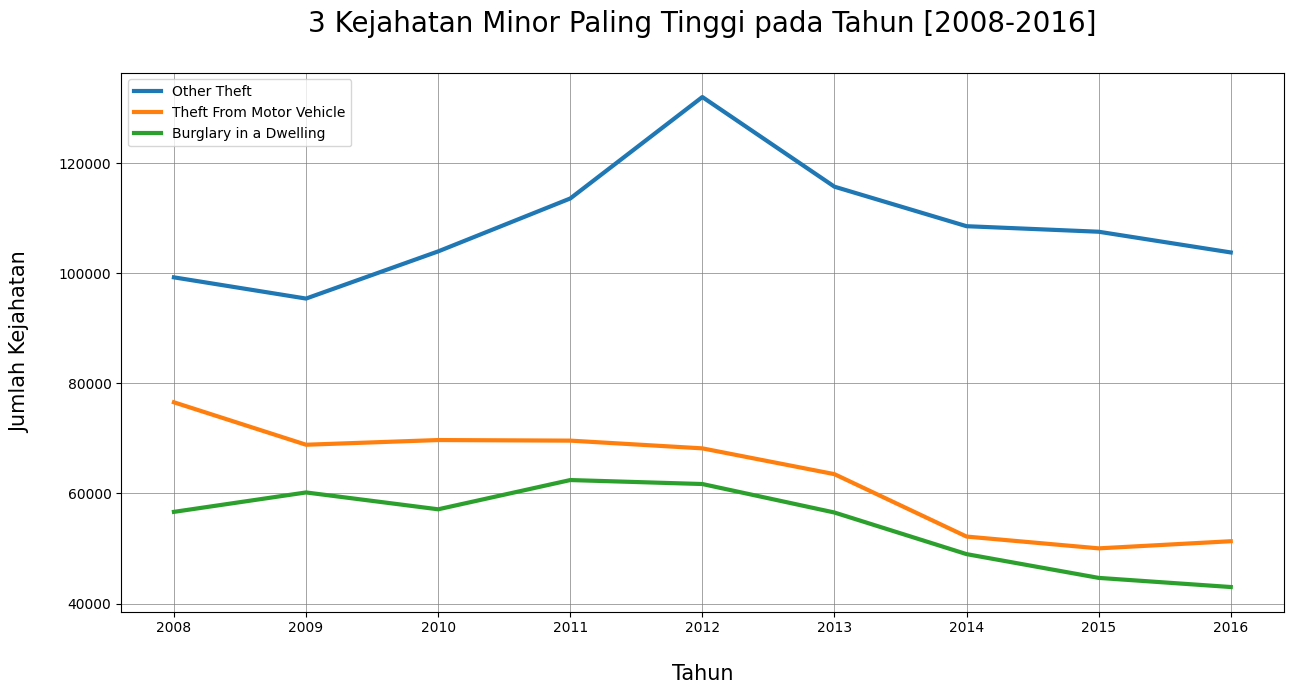

In [22]:
#LINE PLOT untuk melihat tren secara keseluruhan
ht1_top3.plot(kind="line", 
                  figsize=(15,7),
                 linewidth=3)
plt.title("3 Kejahatan Minor Paling Tinggi pada Tahun [2008-2016]\n", fontsize=20)
plt.xlabel("\nTahun", fontsize=15)
plt.ylabel("Jumlah Kejahatan\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

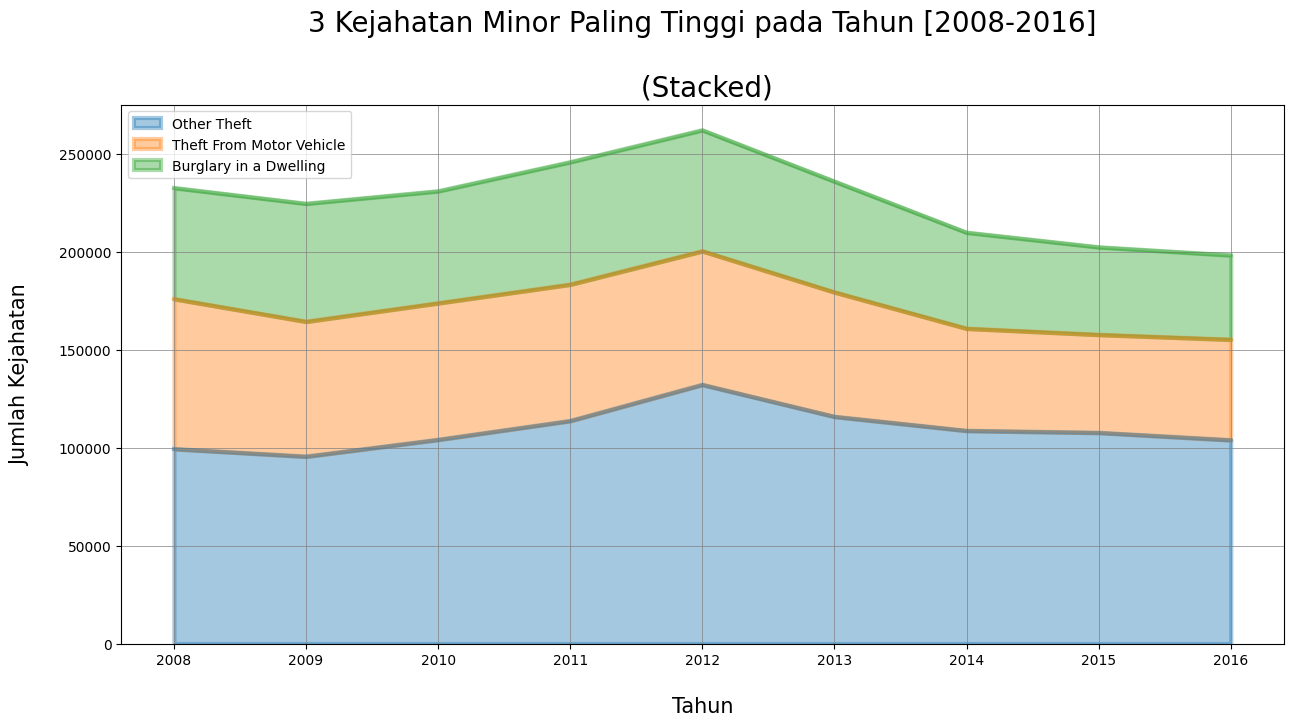

In [23]:
#STACKED AREA PLOT
ht1_top3.plot(kind="area", 
                  figsize=(15,7),
                  stacked=True,
                  alpha=0.4,
                 linewidth=3)
plt.title("3 Kejahatan Minor Paling Tinggi pada Tahun [2008-2016]\n\n (Stacked)", fontsize=20)
plt.xlabel("\nTahun", fontsize=15)
plt.ylabel("Jumlah Kejahatan\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()



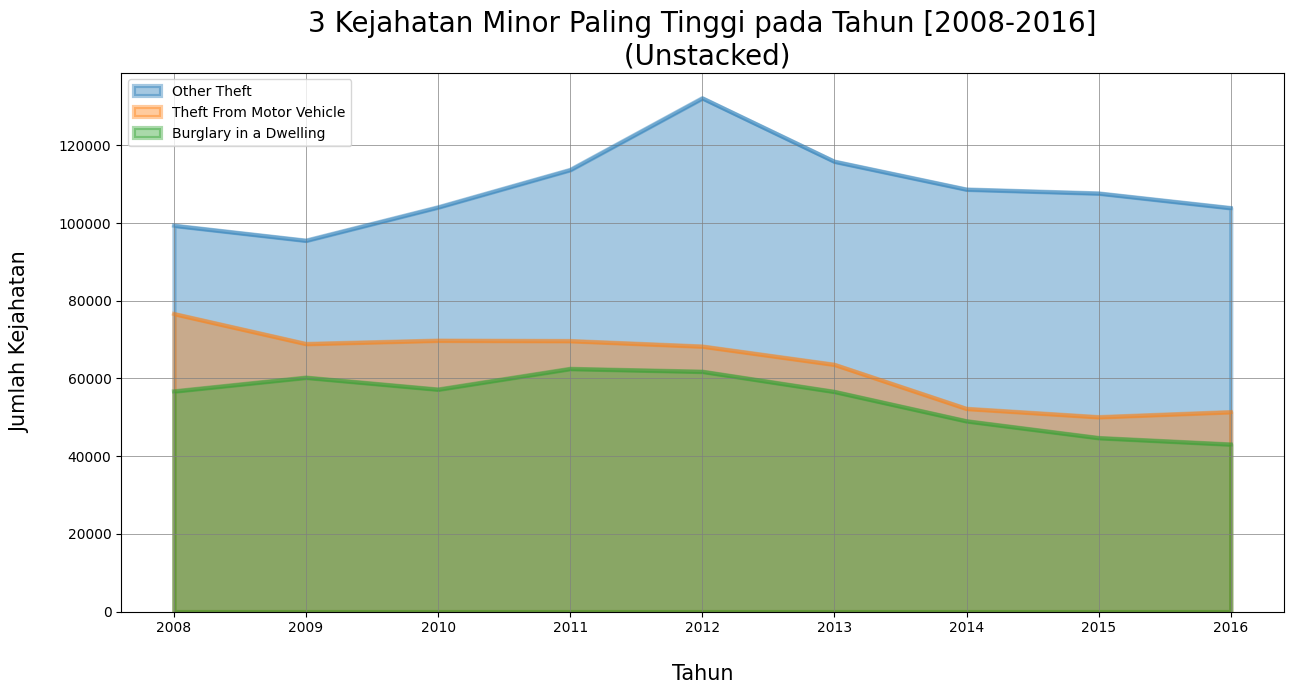

In [24]:
#UNSTACKED AREA PLOT
ht1_top3.plot(kind="area", 
                  figsize=(15,7),
                  stacked=False,
                  alpha=0.4,
                 linewidth=3)
plt.title("3 Kejahatan Minor Paling Tinggi pada Tahun [2008-2016]\n (Unstacked)", fontsize=20)
plt.xlabel("\nTahun", fontsize=15)
plt.ylabel("Jumlah Kejahatan\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

**Berdasarkan plot diatas dapat dilihat bahwa Other Teft adalah kategori kejahatan yang memiliki jumlah tertinggi dari tahun 2008-2016 dan diikuti dengan Theft From Motor Vehicle,dan Burglary in Dwelling.Dilihat bahwa pada tahun 2012 merupakan puncak dari kejahatan kategori Other Teft.Namun, secara signifikan terjadinya penurunan sampai tahun 2016.**

### Pertanyaan 2 : Apa saja 3 Top Kategori kejahatan mayor yang memiliki jumlah tertinggi selama tahun 2008-2016?


In [25]:


top3_mayor = df.drop(["Kode Area","Wilayah","Kejahatan Minor","Bulan"], axis=1)
top3_mayor.set_index("Tahun", inplace=True)
top3_mayor = top3_mayor.groupby("Kejahatan Mayor").sum()
top3_mayor = top3_mayor.sort_values(by="Jumlah Kasus", ascending=False).head(3)
top3_mayor



,Jumlah Kasus
Kejahatan Mayor,
Theft and Handling,2661861
Violence Against the Person,1558081
Burglary,754293


In [26]:
ht1 = df[df['Tahun'] <= 2016]
ht1

,Kode Area,Wilayah,Kejahatan Mayor,Kejahatan Minor,Jumlah Kasus,Tahun,Bulan
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [27]:
ht1 = ht1.pivot_table(index='Kejahatan Mayor', columns='Tahun', values='Jumlah Kasus', aggfunc='sum')
ht1['Total'] = ht1.sum(axis=1)
ht1.sort_values(['Total'], ascending=False, axis=0, inplace=True)
ht1_top3 = ht1.drop('Total', axis=1, inplace=True)
ht1_top3 = ht1.head(n=3).transpose()
ht1_top3

Kejahatan Mayor,Theft and Handling,Violence Against the Person,Burglary
Tahun,,,
2008,283692,159844,88092
2009,279492,160777,90619
2010,290924,157894,86826
2011,309292,146901,93315
2012,334054,150014,93392
2013,306372,146181,87222
2014,279880,185349,76053
2015,284022,218740,70489
2016,294133,232381,68285


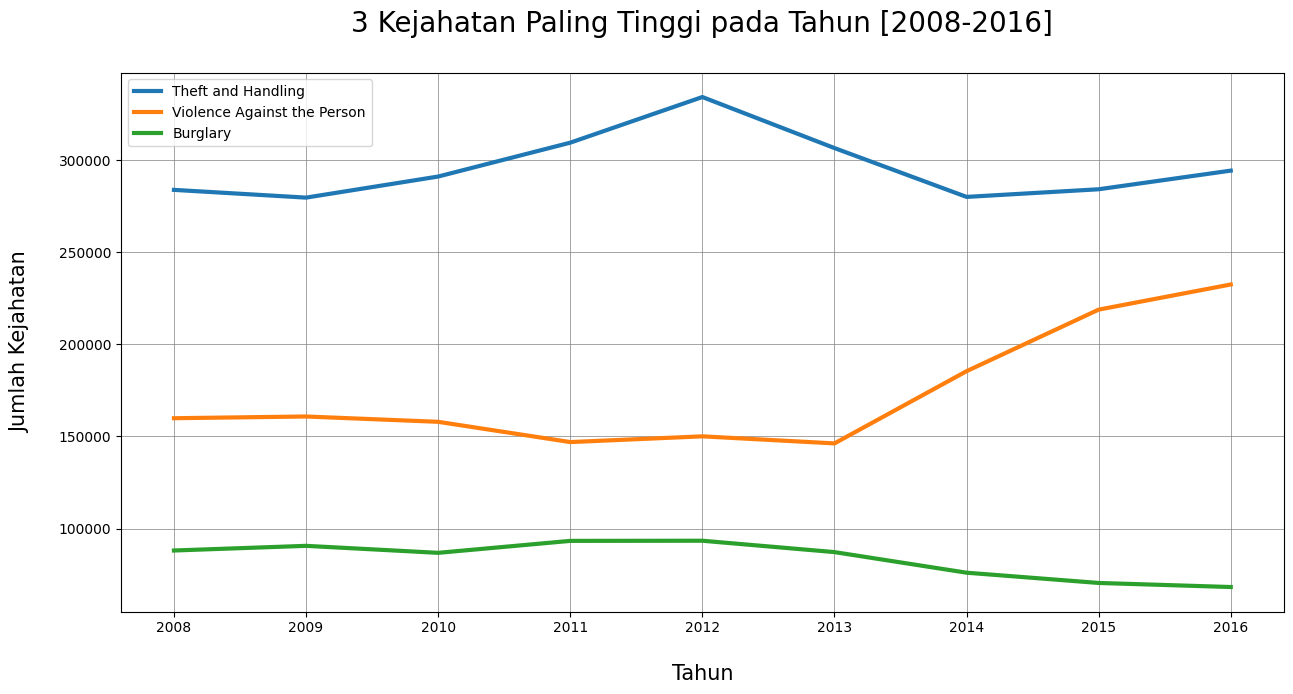

In [28]:
#LINE PLOT untuk melihat tren secara keseluruhan
ht1_top3.plot(kind="line", 
                  figsize=(15,7),
                 linewidth=3)
plt.title("3 Kejahatan Paling Tinggi pada Tahun [2008-2016]\n", fontsize=20)
plt.xlabel("\nTahun", fontsize=15)
plt.ylabel("Jumlah Kejahatan\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

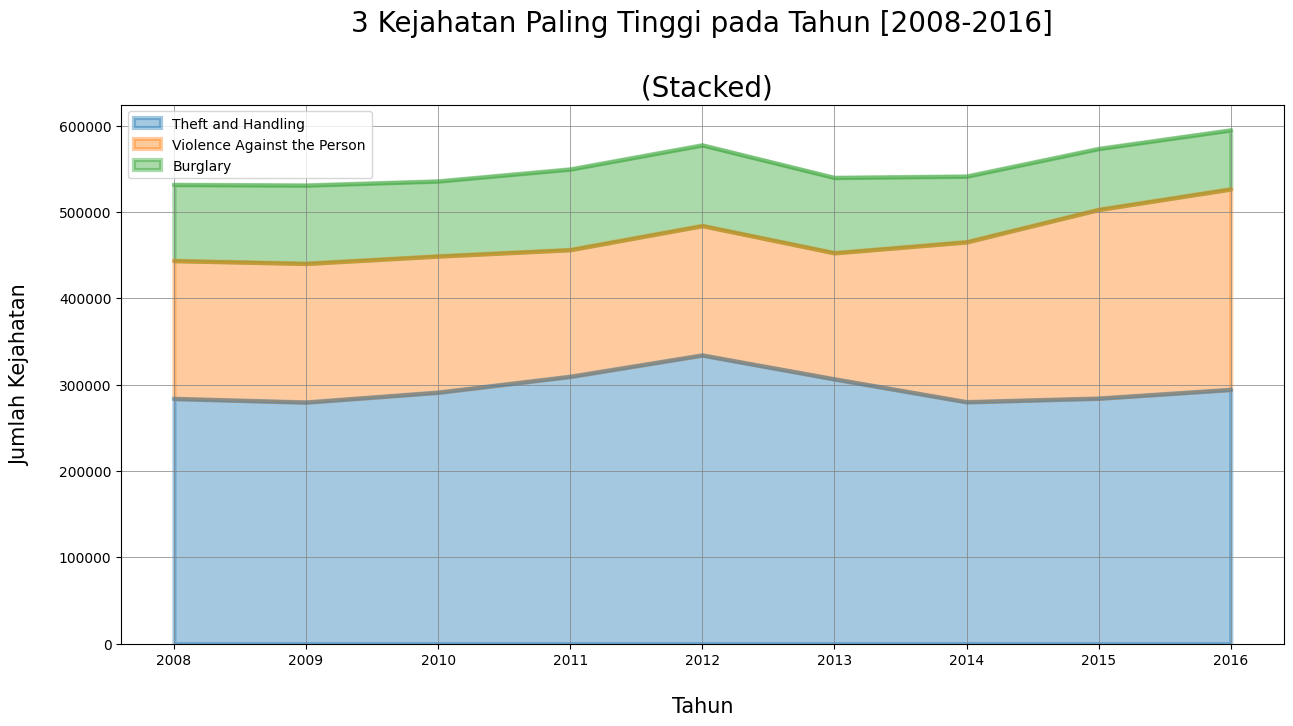

In [29]:
#STACKED AREA PLOT
ht1_top3.plot(kind="area", 
                  figsize=(15,7),
                  stacked=True,
                  alpha=0.4,
                 linewidth=3)
plt.title("3 Kejahatan Paling Tinggi pada Tahun [2008-2016]\n\n (Stacked)", fontsize=20)
plt.xlabel("\nTahun", fontsize=15)
plt.ylabel("Jumlah Kejahatan\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

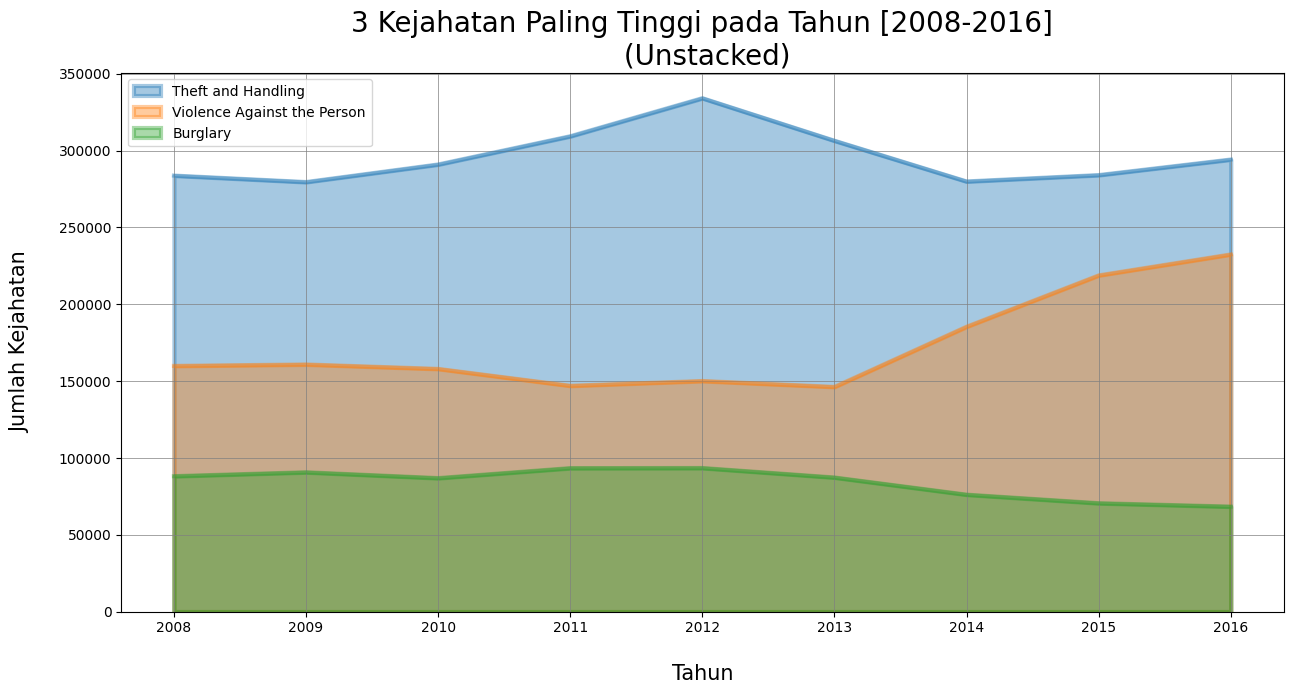

In [30]:
#UNSTACKED AREA PLOT
ht1_top3.plot(kind="area", 
                  figsize=(15,7),
                  stacked=False,
                  alpha=0.4,
                 linewidth=3)
plt.title("3 Kejahatan Paling Tinggi pada Tahun [2008-2016]\n (Unstacked)", fontsize=20)
plt.xlabel("\nTahun", fontsize=15)
plt.ylabel("Jumlah Kejahatan\n", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.legend(loc="upper left")
plt.show()

**Berdasarkan plot diatas dapat dilihat bahwa Theft and Handling adalah kategori kejahatan yang memiliki jumlah tertinggi dari tahun 2008-2016 dan diikuti dengan Violence Againts the Person,dan Burglary.Dilihat bahwa pada tahun 2012 merupakan puncak dari kejahatan kategori Theft and Handling namun secara signifikan terjadinya penurunan sampai tahun 2016.**

## Kesimpulan
Dengan menggunakan Area Plot kita dapat menyimpulkan beberapa informasi dari kumpulan data London Crime, 2008-2016, yaitu:

1.Berdasarkan bentuk area plot maka pada tahun **2012** merupakan puncak dari kategori kejahatan tertinggi yaitu Other Teft dan kejahatan Teft and Handling

2.Kategori Kejahatan minor tertinggi yaitu **Other Teft** dan Kategori Kejahatan Mayor tertinggi adalah **Teft and Handling**

---
## B. Histogram

Histogram adalah penyajian distribusi frekuensi menggunakan gambar yang berbentuk diagram batang tegak

### Pertanyaan  :  Bagaimana distribusi frekuensi 2 kasus kejahatan teratas dari borough London tahun 2008-2015?

In [31]:
ht1 = df[df['Tahun'] <= 2015]
ht1

,Kode Area,Wilayah,Kejahatan Mayor,Kejahatan Minor,Jumlah Kasus,Tahun,Bulan
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [32]:
ht1 = ht1.pivot_table(index='Wilayah', columns='Tahun', values='Jumlah Kasus', aggfunc='sum')
ht1['Total'] = ht1.sum(axis=1)
ht1.sort_values(['Total'], ascending=False, axis=0, inplace=True)
ht1_top3 = ht1.drop('Total', axis=1, inplace=True)
ht1_top3 = ht1.head(n=2).transpose()
ht1_top3

Wilayah,Westminster,Lambeth
Tahun,,
2008,47846,31717
2009,48456,31225
2010,48116,31671
2011,54243,33224
2012,59226,33473
2013,53852,31868
2014,47564,31765
2015,47395,33164


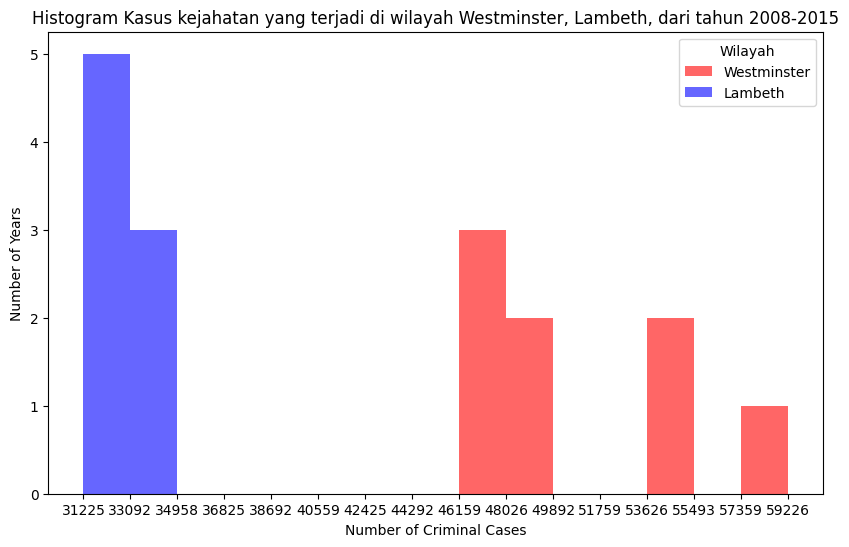

In [33]:
count, bin_edges = np.histogram(ht1_top3, 15)

# un-stacked histogram
ht1_top3.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['red','blue']
         )

plt.title('Histogram Kasus kejahatan yang terjadi di wilayah Westminster, Lambeth, dari tahun 2008-2015')
plt.ylabel('Number of Years')
plt.xlabel('Number of Criminal Cases')

plt.show()

**Berdasarkan histogram diatas maka kita dapat mengetahui 2 wilayah yang jumlah kejahatannya berada di Top 2 dari tahun 2008-2015 adalah Westminster dan Lambeth dimana wilayah Lambert mencapai 31225 sampai 34958  dan wilayah Westminster posisi tertingginya mencapai 46159 sampai 49892.**

---
## C. Bar Chart


Bar Chart merupakan sebuah visualisasi yang ditampilkan berupa grafik dengan bentuk diagram batang, oleh karena itu Bar Chart juga sering disebut sebagai diagram batang. 

### Pertanyaan 1 : Berapa jumlah kejahatan di London tahun 2008-2016 dan bagaimanakah bentuk Bar chartnya ?

In [34]:
bc1 = df.pivot_table(index='Tahun', columns='Wilayah', values='Jumlah Kasus', aggfunc='sum')
bc1['Total'] = bc1.sum(axis=1)
bc1.sort_values(['Total'], ascending=False, axis=0, inplace=True)
bc1_t = bc1['Total'].head(n=9)
bc1_t

Tahun
2008    738641
2012    737329
2016    736121
2011    724915
2009    717214
2010    715324
2015    711624
2013    686407
2014    680183
Name: Total, dtype: int64

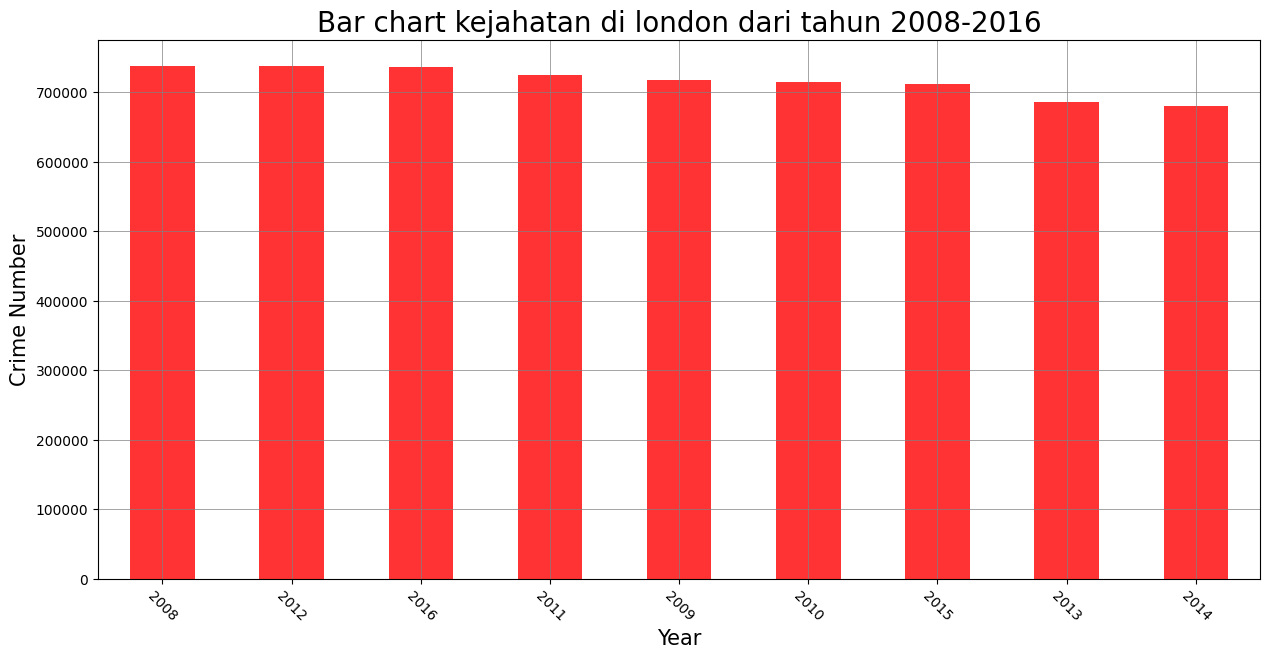

In [35]:
bc1_t.plot(kind="bar",
                figsize=(15,7),
                color="red",
                legend=False,
                alpha=0.8)
plt.title("Bar chart kejahatan di london dari tahun 2008-2016", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Crime Number", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.xticks(rotation=-45)
plt.show()

**Berdasarkan Plot diatas maka dapat dilihat bahwa pada tahun 2008 - 2012 kejahatan yang terjadi mencapai lebih dari 700000 kejahatan tetapi  pada tahun berikutnya yaitu 2013-2014 jumlah kejahatan yang terjadi menurun,namun pada tahun 2016 angka kejahatan kembali naik sampai ke angka 700000 jumlah tindakan kejahatan.**

Kita sudah menjawab pertanyaan pertama,dari pertanyaan tersebut kita dapat melihat bahwa jumlah kejahatan tertinggi yaitu pada tahun 2008.

### Pertanyaan 2 : Kategori kejahatan Mayor apa yang memiliki angka kasus tertinggi di tahun 2008 ?

In [36]:
ht1 = df[df['Tahun'] == 2008]
ht1

,Kode Area,Wilayah,Kejahatan Mayor,Kejahatan Minor,Jumlah Kasus,Tahun,Bulan
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
33,E01032741,Havering,Violence Against the Person,Harassment,0,2008,1
34,E01002533,Hillingdon,Violence Against the Person,Offensive Weapon,0,2008,10
46,E01004678,Westminster,Criminal Damage,Other Criminal Damage,0,2008,11
54,E01000455,Bexley,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2008,5
...,...,...,...,...,...,...,...
13490564,E01002499,Hillingdon,Theft and Handling,Other Theft,0,2008,12
13490567,E01004071,Southwark,Theft and Handling,Motor Vehicle Interference & Tampering,0,2008,6
13490573,E01001764,Hackney,Theft and Handling,Handling Stolen Goods,0,2008,9
13490586,E01004341,Waltham Forest,Sexual Offences,Rape,0,2008,9


In [37]:
ht1 = ht1.pivot_table(index='Kejahatan Mayor', columns='Tahun', values='Jumlah Kasus', aggfunc='sum')
ht1['Total'] = ht1.sum(axis=1)
ht1.sort_values(['Total'], ascending=False, axis=0, inplace=True)
ht1_to = ht1.drop('Total', axis=1, inplace=True)
ht1_to = ht1.head(n=9).transpose()
ht1_to

Kejahatan Mayor,Theft and Handling,Violence Against the Person,Criminal Damage,Burglary,Drugs,Robbery,Other Notifiable Offences,Fraud or Forgery,Sexual Offences
Tahun,,,,,,,,,
2008,283692,159844,91872,88092,68804,29627,10112,5325,1273


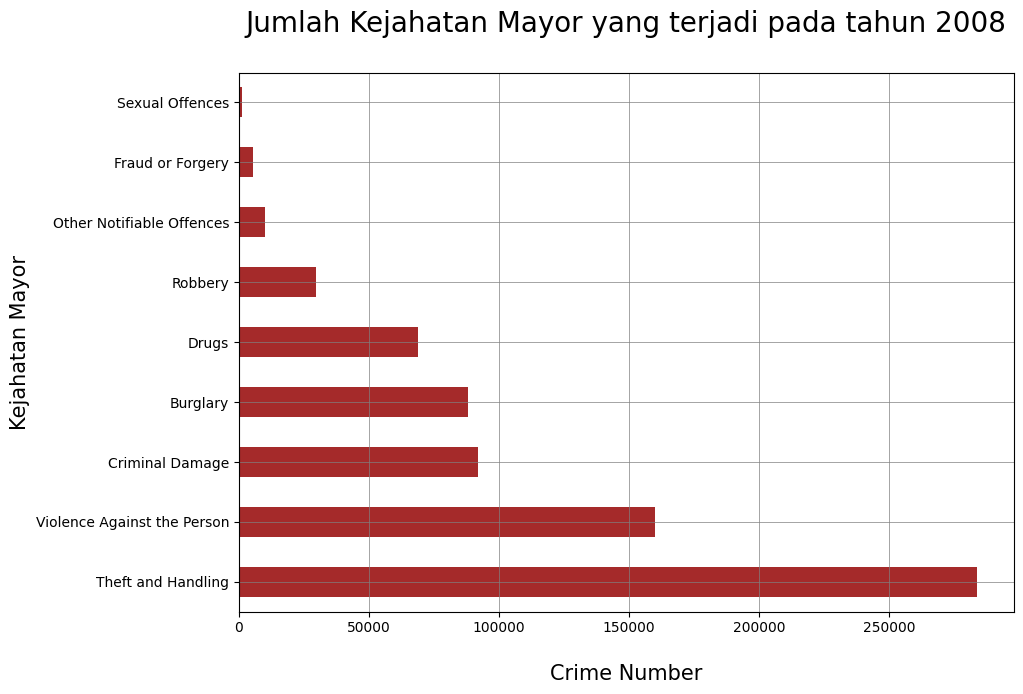

In [38]:
ht1.plot(kind="barh",
               figsize=(10,7),
               color="brown",
               legend=False)
plt.title("Jumlah Kejahatan Mayor yang terjadi pada tahun 2008\n", fontsize=20)
plt.xlabel("\nCrime Number", fontsize=15)
plt.ylabel("Kejahatan Mayor", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.show()

**Berdasarkan plot diatas kita dapat melihat bahwa ternyata kejahatan mayor yang paling banyak terjadi di tahun 2008 adalah Theft and Handling yaitu mencapai lebih dari 250000 tindak kejahatan.**

---
## D. Pie Chart

Pie chart adalah gaya grafik sederhana yang berguna untuk menggambarkan bagian-bagian dari keseluruhan. 

In [39]:
top3 = df.drop(["Kode Area","Wilayah","Kejahatan Minor","Kejahatan Mayor"], axis=1)
top3.set_index("Tahun", inplace=True)
top3 = top3.groupby("Bulan").sum()
top3 = top3.sort_values(by="Jumlah Kasus", ascending=False).head(3)
top3


,Jumlah Kasus
Bulan,
7,563076
10,558252
5,552704


### Pertanyaan : Kasus apa yang persentasenya paling tinggi pada bulan  Juli di Wilayah Ealing ?

In [40]:
ht2 = df[df['Bulan'] == 7]
ht2

,Kode Area,Wilayah,Kejahatan Mayor,Kejahatan Minor,Jumlah Kasus,Tahun,Bulan
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
47,E01003064,Lambeth,Theft and Handling,Theft From Shops,0,2013,7
50,E01001206,Ealing,Robbery,Personal Property,0,2015,7
77,E01001787,Hackney,Criminal Damage,Other Criminal Damage,0,2011,7
101,E01004093,Sutton,Violence Against the Person,Wounding/GBH,0,2016,7
...,...,...,...,...,...,...,...
13490552,E01003836,Richmond upon Thames,Violence Against the Person,Assault with Injury,1,2011,7
13490561,E01003605,Newham,Other Notifiable Offences,Other Notifiable,0,2015,7
13490570,E01004494,Wandsworth,Fraud or Forgery,Other Fraud & Forgery,0,2011,7
13490592,E01033327,Lewisham,Violence Against the Person,Common Assault,2,2013,7


In [41]:
persentase = df.drop(["Kode Area","Tahun","Kejahatan Minor",], axis=1).set_index("Bulan")
persentase = persentase.loc[7]
persentase= pd.pivot_table(persentase, values="Jumlah Kasus", aggfunc=np.size, index="Wilayah", columns="Kejahatan Mayor")
persentase = persentase.loc["Ealing"].transpose()
persentase


Kejahatan Mayor
Burglary                        3528.0
Criminal Damage                 7002.0
Drugs                           4185.0
Fraud or Forgery                 711.0
Other Notifiable Offences       2628.0
Robbery                         3159.0
Sexual Offences                  333.0
Theft and Handling             13401.0
Violence Against the Person    10836.0
Name: Ealing, dtype: float64

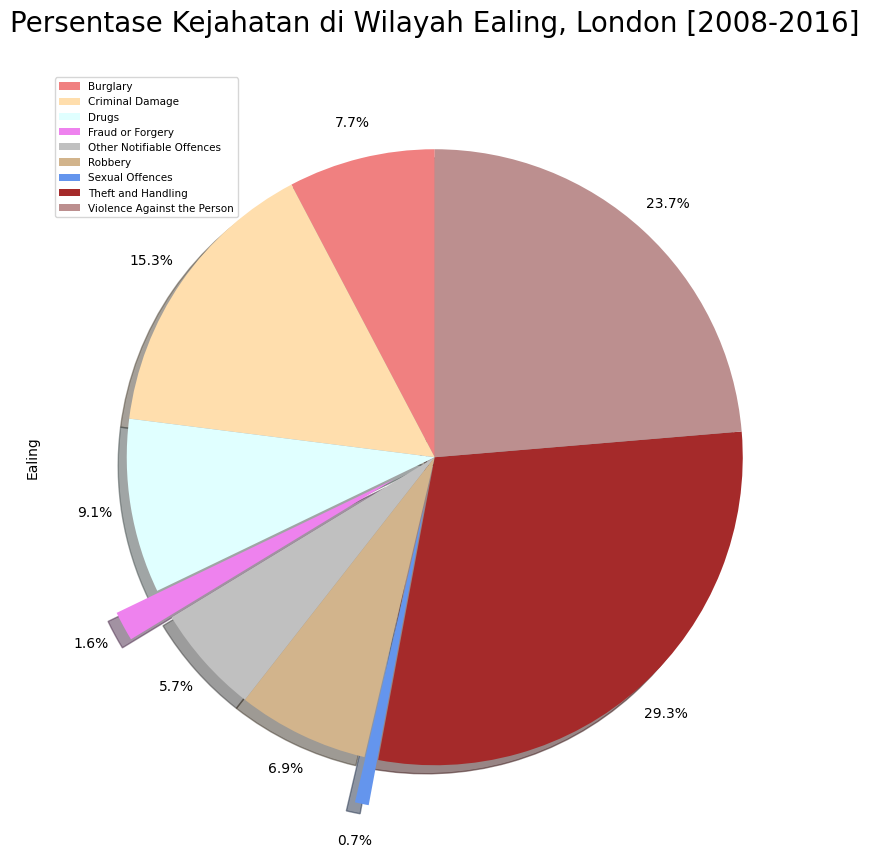

In [42]:
explode_list = [0,0,0,0.15,0,0,0.15,0,0]
color_list = ["lightcoral","navajowhite","lightcyan","violet","silver",
             "tan","cornflowerblue","brown","rosybrown"]
persentase.plot(kind="pie",
                     figsize=(20,10),
                     autopct="%1.1f%%",
                     startangle=90,
                     shadow=True,
                     labels=None,
                     pctdistance=1.12,
                     colors=color_list,
                    explode = explode_list,
                               subplots=True)
plt.title("Persentase Kejahatan di Wilayah Ealing, London [2008-2016]\n", fontsize=20, loc="center")
plt.legend(labels=persentase.index, loc="upper left", prop={"size":7.5})
plt.show()

Berdasarkan gambar Pie chart tersebut maka warna merah yang merupakan Kejahatan Theft and Handling adalah kejahatan yang memiliki persentase terbesar yaitu mencapai 29,3% di wilayah Ealing .

---
## E. Box Plot

### Pertanyaan 1 : Bagaimana box plot yang terbentuk dan pada bulan apa yang memiliki jumlah kejahatan terbanyak di tahun 2008-2016?

In [43]:
bp1 = df.pivot_table(index='Wilayah', columns='Bulan', values='Jumlah Kasus', aggfunc=sum)
bp1.head()

Bulan,1,2,3,4,5,6,7,8,9,10,11,12
Wilayah,,,,,,,,,,,,
Barking and Dagenham,12610,12193,13451,12323,12844,12451,13205,12315,11883,12203,12572,11397
Barnet,17550,16659,18447,17421,17999,17908,18297,16775,16902,18398,18523,17312
Bexley,9576,8959,10133,9179,9903,9492,9805,9063,9053,9783,9929,9261
Brent,18744,17535,19296,18026,19718,19342,19698,18478,18184,20189,20033,18308
Bromley,15770,14684,15843,14714,15785,15159,16164,14703,14616,15757,15749,15405


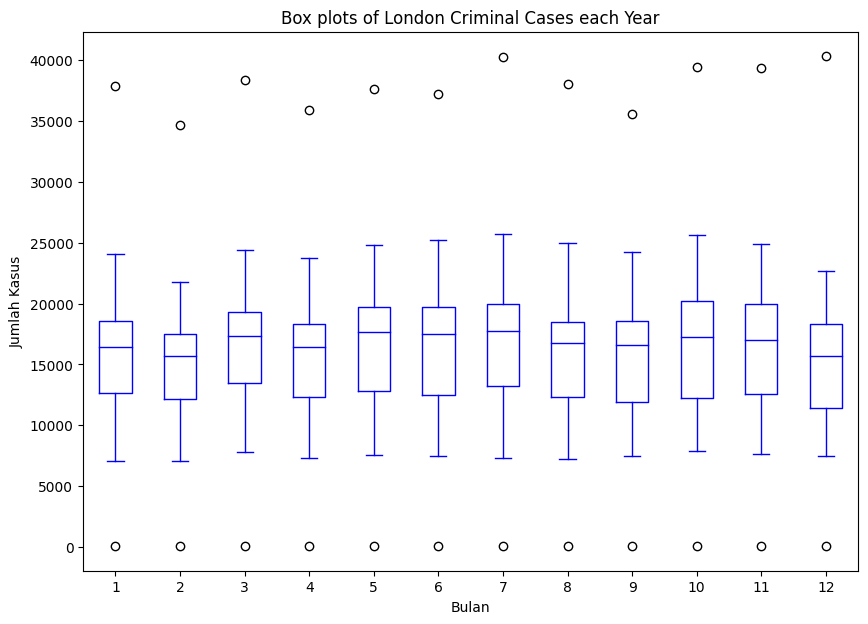

In [44]:
bp1.plot(kind='box', figsize=(10, 7), color='blue', vert=True)

plt.title('Box plots of London Criminal Cases each Year')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Kasus')

plt.show()

**Berdasarkan Plot diatas maka dapat dilihat bahwa dari tahun 2008-2016 bulan 7 merupakan bulan yang memiliki tingkat kejahatan yang paling tinggi artinya pada bulan ini rentan terhadap tidak kejahatan,dan dapat dilihat juga bahwa pada bulan ke 2 merupakan bulan yang jumlah kejahatannya cukup kecil jika dibandingkan dengan jumlah kejahatan di bulan lainnya.**

Dari hasil yang kita temukan bahwa bulan ke 2 merupakan bulan yang memiliki jumlah kejahatan yang cukup kecil jika dibandingkan dengan bulan lain.Maka **pertanyaan ke 2: kita akan mengetahui Kejahatan Minor dan Kejahatan Mayor apa saja yang menjadi Top 1 pada bulan tersebut.** 

## Kejahatan Minor

In [45]:
ht1 = df[df['Bulan'] <= 2]
ht1

,Kode Area,Wilayah,Kejahatan Mayor,Kejahatan Minor,Jumlah Kasus,Tahun,Bulan
12,E01003852,Richmond upon Thames,Robbery,Personal Property,0,2014,1
14,E01002398,Hillingdon,Theft and Handling,Theft/Taking Of Motor Vehicle,0,2016,2
15,E01002358,Havering,Violence Against the Person,Wounding/GBH,0,2012,2
20,E01003651,Redbridge,Violence Against the Person,Harassment,0,2012,2
21,E01004660,Westminster,Theft and Handling,Handling Stolen Goods,0,2012,2
...,...,...,...,...,...,...,...
13490594,E01001706,Greenwich,Criminal Damage,Criminal Damage To Other Building,0,2008,2
13490595,E01001144,Croydon,Violence Against the Person,Harassment,0,2012,1
13490598,E01032577,Hillingdon,Theft and Handling,Other Theft,0,2012,2
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2


In [46]:
ht1 = ht1.pivot_table(index='Kejahatan Minor', columns='Tahun', values='Jumlah Kasus', aggfunc='sum')
ht1['Total'] = ht1.sum(axis=1)
ht1.sort_values(['Total'], ascending=False, axis=0, inplace=True)
ht1_top3 = ht1.drop('Total', axis=1, inplace=True)
ht1_top3 = ht1.head(n=3).transpose()
ht1_top3

Kejahatan Minor,Other Theft,Theft From Motor Vehicle,Burglary in a Dwelling
Tahun,,,
2008,16325,13611,10498
2009,14962,11451,10686
2010,15236,10596,9819
2011,17115,10915,11439
2012,20882,11611,11494
2013,19917,11181,11197
2014,16955,9877,9813
2015,16706,7988,8540
2016,16095,7631,8148


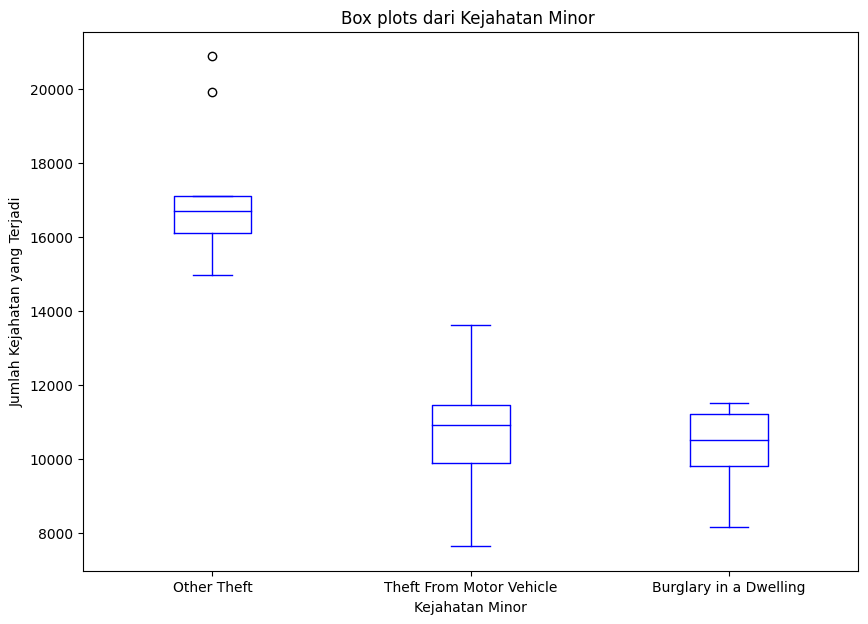

In [47]:
ht1_top3.plot(kind='box', figsize=(10, 7), color='blue', vert=True)

plt.title('Box plots dari Kejahatan Minor ')
plt.xlabel('Kejahatan Minor')
plt.ylabel('Jumlah Kejahatan yang Terjadi')

plt.show()

**Berdasarkan Plot diatas maka dapat dilihat bahwa Kejahatan Minor yang menjadi Top 1 pada bulan february untuk setiap tahunnya adalah Kategori Other Theft.**

## Kejahatan Mayor

In [48]:
ht1 = df[df['Bulan'] == 2]
ht1

,Kode Area,Wilayah,Kejahatan Mayor,Kejahatan Minor,Jumlah Kasus,Tahun,Bulan
14,E01002398,Hillingdon,Theft and Handling,Theft/Taking Of Motor Vehicle,0,2016,2
15,E01002358,Havering,Violence Against the Person,Wounding/GBH,0,2012,2
20,E01003651,Redbridge,Violence Against the Person,Harassment,0,2012,2
21,E01004660,Westminster,Theft and Handling,Handling Stolen Goods,0,2012,2
25,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2
...,...,...,...,...,...,...,...
13490591,E01000193,Barnet,Criminal Damage,Other Criminal Damage,0,2016,2
13490594,E01001706,Greenwich,Criminal Damage,Criminal Damage To Other Building,0,2008,2
13490598,E01032577,Hillingdon,Theft and Handling,Other Theft,0,2012,2
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2


In [49]:
ht1 = ht1.pivot_table(index='Kejahatan Mayor', columns='Tahun', values='Jumlah Kasus', aggfunc='sum')
ht1['Total'] = ht1.sum(axis=1)
ht1.sort_values(['Total'], ascending=False, axis=0, inplace=True)
ht1_top3 = ht1.drop('Total', axis=1, inplace=True)
ht1_top3 = ht1.head(n=3).transpose()
ht1_top3

Kejahatan Mayor,Theft and Handling,Violence Against the Person,Burglary
Tahun,,,
2008,22980,12123,7296
2009,20819,12055,7107
2010,21523,12147,7153
2011,22743,11150,7474
2012,25001,11058,7639
2013,25410,10316,7757
2014,21715,12057,6767
2015,21243,15458,5974
2016,22028,17642,5841


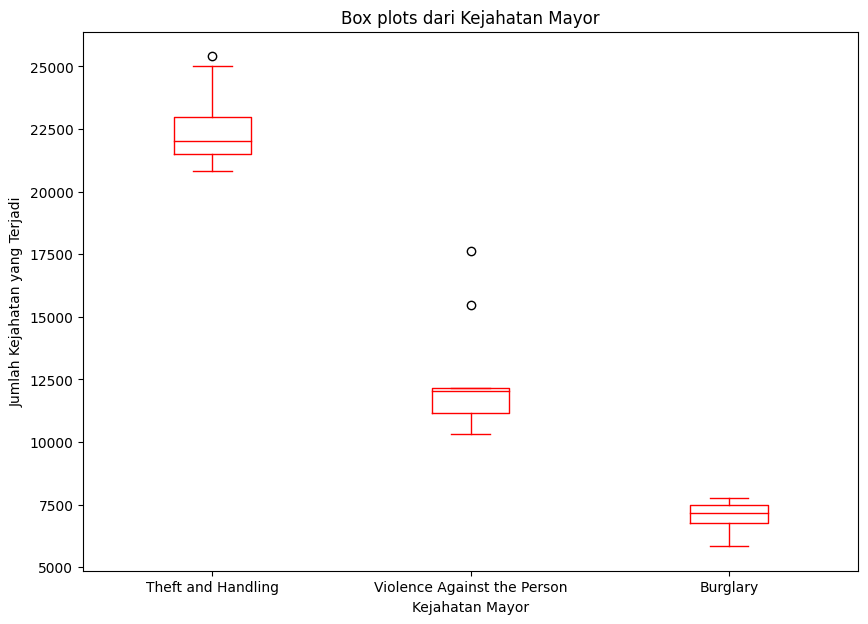

In [50]:
ht1_top3.plot(kind='box', figsize=(10, 7), color='red', vert=True)

plt.title('Box plots dari Kejahatan Mayor')
plt.xlabel('Kejahatan Mayor')
plt.ylabel('Jumlah Kejahatan yang Terjadi')

plt.show()

**Berdasarkan Plot diatas maka dapat dilihat bahwa Kejahatan mayor yang menjadi Top 1 pada bulan February adalah Kategori Kejahatan Theft and Handling.**

## Kesimpulan
Dengan menggunakan Box Plot kita dapat menyimpulkan beberapa informasi dari kumpulan data London Crime, 2008-2016, yaitu:

1.Berdasarkan bentuk Box plot maka bulan Juli merupakan bulan yang memiliki jumlah kejahatan yang paling tinggi,dan pada bulan February jumlah kejahatannya paling rendah.

2.Kategori Kejahatan minor tertinggi yang terjadi di bulan February pada tahun 2008-2016 yaitu **Other Teft** dan Kategori Kejahatan Mayor tertinggi yang terjadi di bulan February pada tahun 2008-2016 adalah **Teft and Handling**

---
## F. Scatter Plot

### Pertanyaan : Pada bulan apa jumlah kasus kejahatan/kriminal di London mencapai angka tertinggi pada tahun 2016 ?

In [51]:
month_crime2016 = df.drop(["Kode Area","Wilayah","Kejahatan Minor","Kejahatan Mayor"], axis=1).set_index("Tahun")
month_crime2016 = month_crime2016.loc[2016]
month_crime2016 = month_crime2016.reset_index().drop("Tahun", axis=1)
month_crime2016 = month_crime2016.groupby("Bulan").sum()
month_crime2016 = month_crime2016.reset_index()
month_crime2016

,Bulan,Jumlah Kasus
0,1,58847
1,2,56697
2,3,59167
3,4,58637
4,5,63990
5,6,62262
6,7,65519
7,8,62666
8,9,61412
9,10,63405


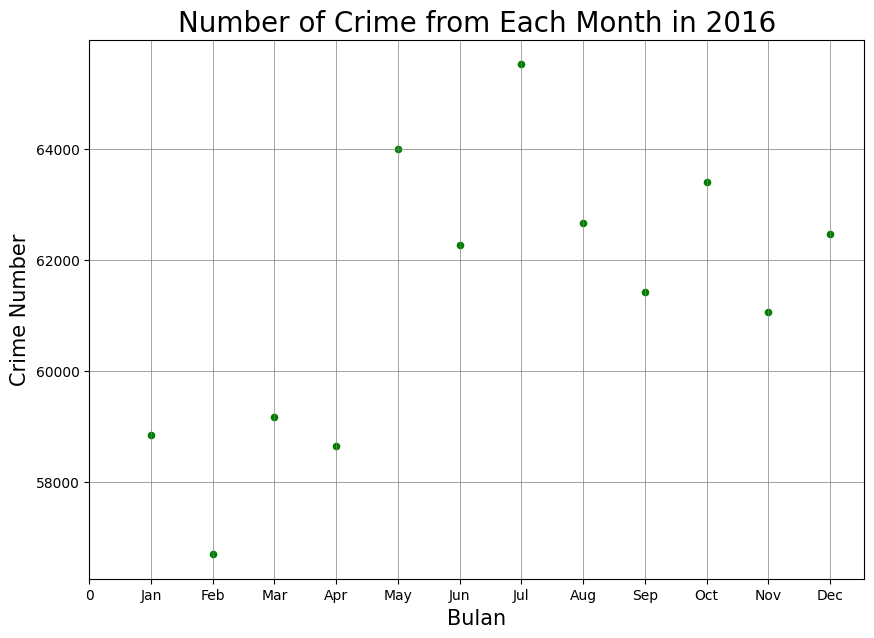

In [52]:
months = np.arange(len(month_crime2016["Bulan"])+1)
name_of_months=['0','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

month_crime2016.plot(kind="scatter", x="Bulan",y="Jumlah Kasus",figsize=(10,7), color="Green")
plt.title("Number of Crime from Each Month in 2016", fontsize=20)
plt.xlabel("Bulan", fontsize=15)
plt.ylabel("Crime Number", fontsize=15)
plt.xticks(months, name_of_months)
plt.grid(color="grey", linewidth=0.5)
plt.show()

**Pada tahun 2016, jumlah kasus kejahatan mencapai angka tertinggi di bulan Juli dan mencapai angka terendah di bulan Februari. Dengan scatterplot, kita bisa membandingkan jumlah kasus kejahatan/kriminal setiap bulannya di tahun-tahun tertentu.**

## G. Word Clouds 

### Pertanyaan : Kata-kata apa yang sering muncul dalam kasus Kejahatan Minor di London pada tahun 2008-2016?

In [66]:
wc1 = df['Kejahatan Minor']

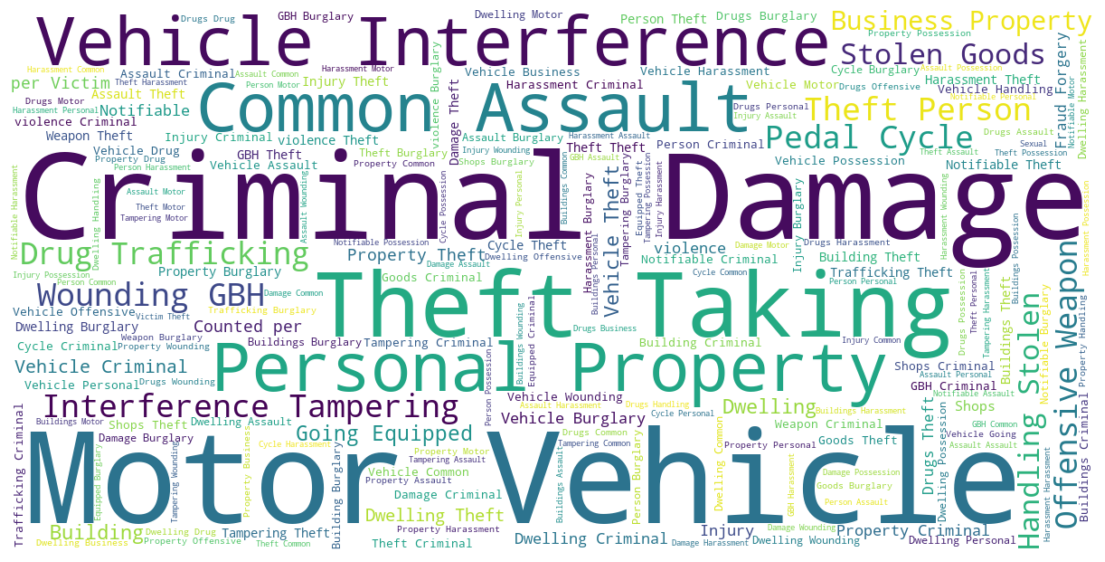

Elapsed time: 57 sec.


In [67]:
# It will take a little longer to process
tic = default_timer()

stopwords = set(STOPWORDS)
wc_crime = WordCloud(width=1200, height=600, background_color='white', stopwords=stopwords, random_state=1)
wc_crime.generate(' '.join(wc1.values))
fig = plt.figure(figsize=(14, 18))

plt.imshow(wc_crime, interpolation='bilinear')
plt.axis('off')
plt.show()

toc = default_timer()
print('Elapsed time: ' + str(round(toc-tic)) + ' sec.')

**Pada wordcloud diatas data dilihat bahwa bahwa Criminal Damage, Motor Vehicle,Theft Taking,vehicle Interference tercetak dengan fontsize yang lebih besar dari yang lain dapat disimpulkan bahwa Kejahatan tersebut banyak disebut atau sering muncul dalam kasus kejahatan Minor.**

### H .Folium Maps

Folium memberikan kemampuan untuk mengikat data ke peta untuk visualisasi choropleth dan juga memberikan kemampuan visualisasi vektor/raster/html sebagai sebuah penanda di atas peta.

In [68]:
london_map = folium.Map(location=[51.51275, -0.12632], zoom_start=11)
display(london_map)

In [69]:
m = folium.Map(location=[51.507351, -0.127758], zoom_start=15)
m

Karena dataset yang kita miliki masih kurang lengkap sehingga kita tidak dapat menganalisis lebih dalam menggunakan peta Folium,jadi kita hanya dapat memperkirakan area dan Wilayahnya.

# Kesimpulan Hasil Visualisasi

Berdasarkan dataset yang ada maka kesimpulannya dari tahun 2008-2016 adalah :
1. Kejahatan yang paling tinggi jumlahnya untuk Kategori Kejahatan minor tertinggi yaitu **Other Teft** dan Kategori Kejahatan Mayor tertinggi adalah **Teft and Handling** 

2. Puncak jumlah kejahatan paling tinggi yaitu terjadi pada tahun 2012 dan paling rendah 2008.Selain itu bulan juli juga merupakan bulan yang memiliki jumlah kejahatan yang paling banyak terjadi.

3. 2 wilayah yang jumlah kejahatannya berada di Top 2 dari tahun 2008-2015 adalah **Westminster** dan **Lambeth** dimana wilayah Lambert mencapai 31225 sampai 34958  dan wilayah Westminster posisi tertingginya mencapai 46159 sampai 49892.

4. pada tahun 2008 - 2012 kejahatan yang terjadi mencapai lebih dari 700000 kejahatan tetapi  pada tahun berikutnya yaitu 2013-2014 jumlah kejahatan yang terjadi menurun,namun pada tahun 2016 angka kejahatan kembali naik sampai ke angka 700000 jumlah tindakan kejahatan.

5. Kejahatan Theft and Handling adalah kejahatan yang memiliki persentase terbesar yaitu mencapai 29,3% di wilayah Ealing

6. Dari tahun 2008-2016 bulan 7 merupakan bulan yang memiliki tingkat kejahatan yang paling tinggi artinya pada bulan ini rentan terhadap tidak kejahatan,dan dapat dilihat juga bahwa pada bulan ke 2 merupakan bulan yang jumlah kejahatannya cukup kecil jika dibandingkan dengan jumlah kejahatan di bulan lainnya.
